# AE8152 Project 1

**Name**: Mohamed Azouz

**STUDENT ID** : 500817774

## Step 1: Data Processing

In [711]:
import pandas as pd

In [712]:
df = pd.read_csv("Project 1\Project 1 Data.csv")
df

,X,Y,Z,Step
0,9.375,3.0625,0.50,1
1,9.375,3.0625,0.51,1
2,9.375,3.0625,0.52,1
3,9.375,3.0625,0.53,1
4,9.375,3.0625,0.54,1
...,...,...,...,...
855,0.000,3.0625,1.89,13
856,0.000,3.0625,1.90,13
857,0.000,3.0625,1.91,13
858,0.000,3.0625,1.92,13


## Step 2: Data Visualization

In [713]:
import numpy as np
import matplotlib.pyplot as plt

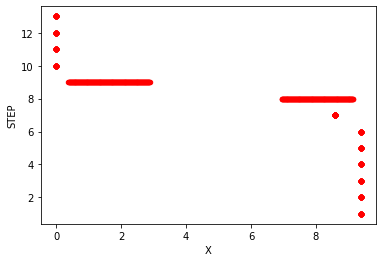

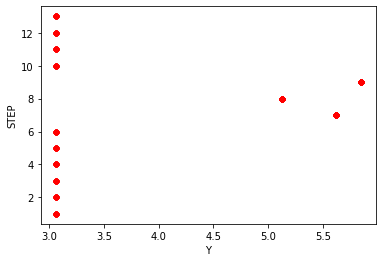

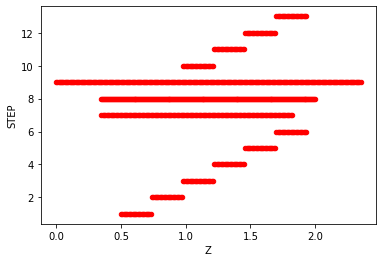

In [714]:
df.plot(kind='scatter',x='X',y='Step',color='red')
plt.ylabel('STEP')
plt.show()
df.plot(kind='scatter',x='Y',y='Step',color='red')
plt.ylabel('STEP')
plt.show()
df.plot(kind='scatter',x='Z',y='Step',color='red')
plt.ylabel('STEP')
plt.show()

        Looking at the Scatter plot of X vs Step, Y vs step and Z vs Stepp; the is no conclusion can be done on the relationship of the data. But looking at X vs step there is a sord of one-to-one relation between X and Step, when X is in the range of 0.25 to 3.75 STEP is shown to be at a constant value above 8. Also for most of the part the range of X does not affect the STEP significantly. 

In [715]:
df.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>],
       [<AxesSubplot:title={'center':'Z'}>,
        <AxesSubplot:title={'center':'Step'}>]], dtype=object)

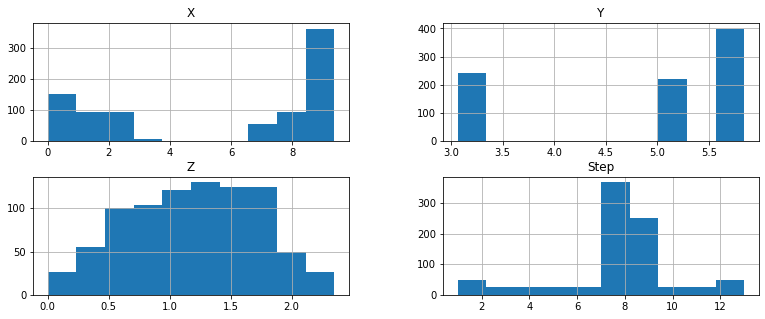

In [716]:
df.hist(figsize=(13,5))

The histogram shows a normal distribution of the Z values and the step values around 1.25 and 7.5 respectively. The histogram of the Y values indicate that the Y is only allocated in three range of values, (3:3.2), (5:5:3) and (5:6,5:8). 

In [717]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


### No need to normalize since all the data are coordinates and quantify the same unit. 


In [718]:
IndexGen = StratifiedShuffleSplit(n_splits=1, test_size= 0.2)
for trainInddex , TestIndex in IndexGen.split(df,df["Step"]):
    train = df.loc[trainInddex]
    test = df.loc[TestIndex]



<AxesSubplot:xlabel='Z', ylabel='Step'>

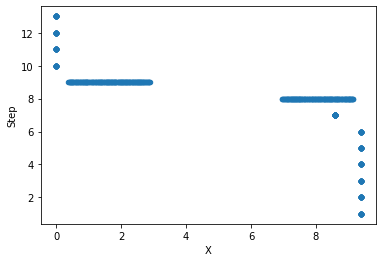

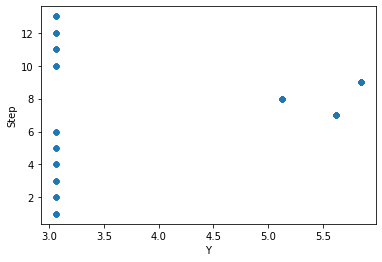

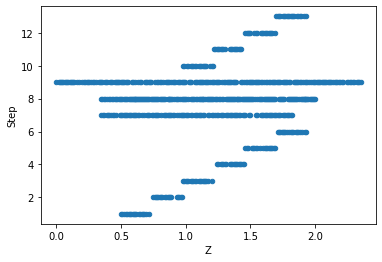

In [719]:
train.head()
train.plot(kind = "scatter",x="X", y='Step')
train.plot(kind = "scatter",x="Y", y='Step')
train.plot(kind = "scatter",x="Z", y='Step')

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>],
       [<AxesSubplot:title={'center':'Z'}>,
        <AxesSubplot:title={'center':'Step'}>]], dtype=object)

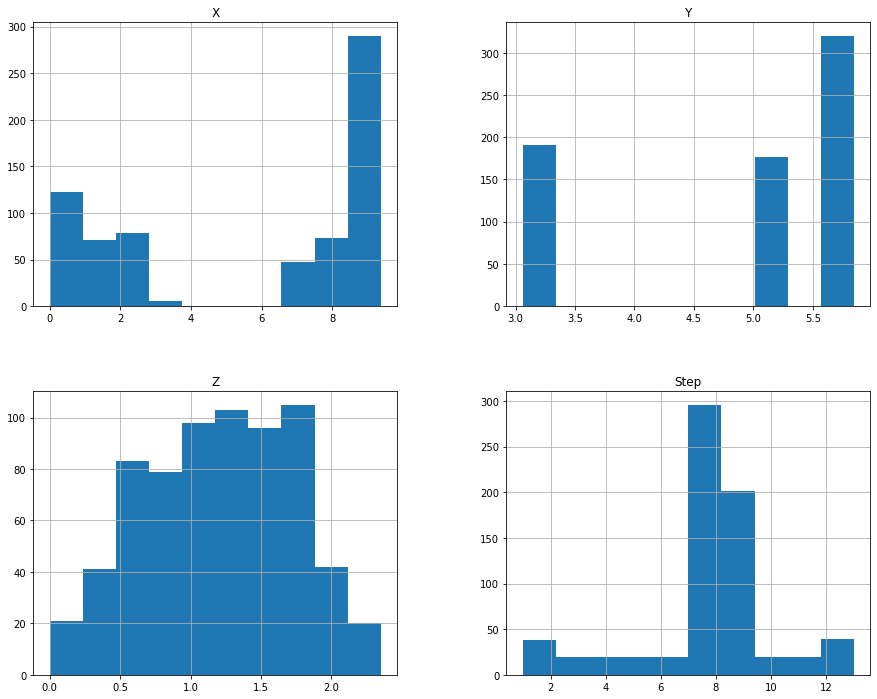

In [720]:
train.hist(figsize=(15,12))

The histogram of the train values are a subset of the main data frame which should indicate the same properties as the data frame since it was shuffled using “StratifiedShuffleSplit” method. 

## Step 3: Correlation Analysis

In [721]:
import seaborn as sb

In [722]:
train_corr = train.corr()
train_corr


,X,Y,Z,Step
X,1.000000,-0.135817,0.002009,-0.750435
Y,-0.135817,1.000000,-0.121991,0.286561
Z,0.002009,-0.121991,1.000000,0.206795
Step,-0.750435,0.286561,0.206795,1.000000


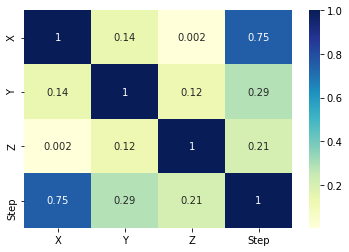

In [723]:
corr_data_plot = sb.heatmap(abs(train_corr),cmap = "YlGnBu", annot= True)

In [724]:
train_corr["Step"].sort_values()

X      -0.750435
Z       0.206795
Y       0.286561
Step    1.000000
Name: Step, dtype: float64

Looking at the correlation plot, its clear that Y and Z don’t impact the STPE value as much with a correlation value for Z-Step of 0.19 and Y-Step of 0.29. But looking at the correlation of X-Step which is 0.75 its correct to assume that the X got a strong impact on the target variable “Step” which would affect my prediction but due to the limited number of features, I did not eliminate the feature X. Eliminating it might negatively impact the prediction and cause wrong predication since Step is one out of the three features that affect target variable. 

## Step 4: Classification Model Development/Engineering

In [725]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

I have chosen to include the following three classifiers (Stochastic Gradient Descent - Classifier (SGD-Classifier), Random Forest Classifier and the Support Vector Classification (SVC)). I have chosen the SGD-Classifier as a base algorithm as it uses SGD and best works for linear relations which what seams the case for the X feature.  Secondly, Random Forest Classifier is ultimately known as one of the best classifiers as it works best with unrelated models, both Z and Y showed the least correlation. RFC uses a set decision tree to classify and then based on the result of that is classifies the output. Looking at the feature values, it ideal to assume that we are working with some what with a binary classifier, SGD and SVC work best with binary classifier.  Using both RFC and the two binary classifiers to cover the widest rage of algorithm that the feature data follow. Then after computing for the precision and accuracy we can then indicate which model works best for the provided data. 

In [726]:
#RFC = RandomForestClassifier(n_estimators=10)
x_train = train[["X","Y","Z"]]
x_train=(x_train-x_train.mean()/x_train.std())
y_train = train[["Step"]]
y_train_array = y_train.to_numpy()
y_train_array = y_train_array[:,0]




In [727]:
x_test = test[["X","Y","Z"]]
x_test= (x_test-x_test.mean()/x_test.std())
y_test = test[["Step"]]
y_test_array = y_test.to_numpy()
y_test_array = y_test_array[:,0]

**Classification Model**: Stochastic Gradient Descent - Classifier (SGD-Classifier)

In [728]:
sdg_clf_grid= {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}

In [729]:
sdg_clf = SGDClassifier(max_iter= 1000, tol=1e-4)
sdg_clf.fit(x_train,y_train_array)

SGDClassifier(tol=0.0001)

In [730]:
prediction_sdg_clf = sdg_clf.predict(x_test)

**Classification Model**: Random Forest Classifier

In [731]:
rf_grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [732]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_grid, cv= 3)
rf_cv.fit(x_train, y_train_array)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [733]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 18}

In [734]:
rf2 = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 'sqrt',random_state = 18, criterion = 'entropy').fit(x_train, y_train_array)

In [757]:
prediction_rf2 = rf2.predict(x_test)

**Classification Model**: Support Vector Classification (SVC)

In [735]:
SVC_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

In [736]:
SVC_cv = GridSearchCV(SVC(), SVC_grid, cv=3)
SVC_cv.fit(x_train, y_train_array)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [737]:
SVC_cv.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [738]:
SVC1 = SVC(C = 1000, kernel = 'linear').fit(x_train, y_train_array)

In [739]:
prediction_SVC1 = SVC1.predict(x_test)


## Step 5: Model Performance Analysis

In [740]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

**Model scoring**: Accuracy

In [741]:
cross_val_score(sdg_clf, x_train, y_train_array, cv=3, scoring="accuracy")

array([0.65217391, 0.71179039, 0.65938865])

In [742]:
cross_val_score(rf2, x_train, y_train_array, cv=3, scoring="accuracy")

array([0.99565217, 0.99126638, 0.99563319])

In [743]:
cross_val_score(SVC1, x_train, y_train_array, cv=3, scoring="accuracy")

array([0.99130435, 0.99126638, 0.99563319])

**Model scoring**: precision

In [744]:
cross_val_score(sdg_clf, x_train, y_train_array, cv=3, scoring="precision_micro")

array([0.81304348, 0.65938865, 0.86462882])

In [745]:
cross_val_score(rf2, x_train, y_train_array, cv=3, scoring="precision_micro")

array([0.99565217, 0.99126638, 0.99563319])

In [746]:
cross_val_score(SVC1, x_train, y_train_array, cv=3, scoring="precision_micro")

array([0.99130435, 0.99126638, 0.99563319])

**Model scoring**: F1 score

In [758]:
f1_score(y_test_array, prediction_sdg_clf, average='micro')

0.6162790697674418

In [759]:
f1_score(y_test_array, prediction_rf2, average='micro')

0.9709302325581395

In [760]:
f1_score(y_test_array, prediction_SVC1, average='micro')

0.9651162790697675

In [756]:
confusion_matrix(y_test_array, prediction_rf2)

array([[ 0,  0,  0,  0,  0,  0,  1,  2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  2,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0],
       [ 2,  1,  0,  2,  0,  0,  5,  8,  9,  1,  1,  0,  0],
       [ 3,  1,  2,  0,  0,  0,  9,  9, 12,  4,  2,  2,  0],
       [ 3,  2,  1,  1,  3,  0,  7, 15, 13,  4,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  1,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0]], dtype=int64)

From the  model scoring test that was conducted above, the best precision is conducted at the third fold is 0.99563319 by the SVC model but the RFC also showed promising precision of 0.9956. Since I have used grid Search CV to access the hyperlinks and out outstanding results, both models resulted in very high precision and accuracy. Looking at the F1 values, the F1 value for SVC is lower compared to the RFC yet it has a high precision as it was indicated before, thus its correct to assume that it got lower recall value than RFC. Which means the best performing model is the SVC since it got high precision and lower recall. 

## Step 6: Model Evaluation

In [761]:
import joblib

In [762]:
joblib.dump(SVC1, "my_model1.pkl")

['my_model1.pkl']

In [767]:
# test [9.375,3.0625,1.51]
my_model_loaded = joblib.load("my_model1.pkl")
te1 = np.array([[9.375,3.0625,1.51], [6.995,5.125,0.3875], [0,3.0625,1.93], [9.4,3,1.8], [9.4,3,1.3]])
my_model_loaded.predict(te1)

array([7, 7, 9, 7, 7], dtype=int64)